Preprossin Data

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('data/raw_data/HDHI Admission data.csv')

df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [4]:
(df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

BNP                                53.569842
EF                                  9.551311
GLUCOSE                             5.476931
TLC                                 1.815066
PLATELETS                           1.808720
HB                                  1.599289
CREATININE                          1.567557
UREA                                1.529479
SNO                                 0.000000
STEMI                               0.000000
HEART FAILURE                       0.000000
HFREF                               0.000000
HFNEF                               0.000000
VALVULAR                            0.000000
CHB                                 0.000000
SSS                                 0.000000
AKI                                 0.000000
CVA INFRACT                         0.000000
CVA BLEED                           0.000000
AF                                  0.000000
VT                                  0.000000
PSVT                                0.000000
CONGENITAL

In [5]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [6]:
df.drop(columns=[
    'SNO',
    'MRD No.',
    'D.O.A',
    'D.O.D',
    'BNP',
    'duration of intensive unit stay'
    ], inplace=True)
df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,OUTCOME,SMOKING,ALCOHOL,DM,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,Apr-17,3,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,Apr-17,5,DISCHARGE,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,53,M,U,E,Apr-17,3,DISCHARGE,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,67,F,U,E,Apr-17,8,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60,F,U,E,Apr-17,23,DISCHARGE,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df = df.replace('EMPTY',np.NaN)

In [8]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy="mean")

# Fit the imputer on the selected columns
imputer.fit(df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']])

# Transform the columns and assign the results back to the respective columns
df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']] = imputer.transform(df[['EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']])

# The mean is stored in the transformer's memory
imputer.statistics_

array([ 43.46125159, 162.90279503,  11.52497691, 238.61702516,
        12.2206348 ,   1.34363595,  50.16118804])

In [9]:
# filter the expiry outcome and drop it

df = df[df['OUTCOME'] == 'DISCHARGE']
df.drop(columns='OUTCOME', inplace=True)

# cleaning 'CHEST INFECTION'

df = df[df['CHEST INFECTION'].isin(['1', '0'])]
df['CHEST INFECTION'] = df['CHEST INFECTION'].astype('int')

df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,81,M,R,E,Apr-17,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,65,M,R,E,Apr-17,5,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,53,M,U,E,Apr-17,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,67,F,U,E,Apr-17,8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,60,F,U,E,Apr-17,23,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,60,F,U,E,Mar-19,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15752,86,F,U,O,Mar-19,5,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15754,82,M,U,E,Mar-19,10,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15755,59,F,U,O,Mar-19,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Date feature

In [10]:
month_dict = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

df['month_nb'] = df['month year'].apply(lambda x: month_dict[x[:3]])

months_in_a_year = 12

df['sin_admission'] = np.sin(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)
df['cos_admission'] = np.cos(2 * np.pi * (df['month_nb'] - 1) / months_in_a_year)

df.drop(columns=['month year', 'month_nb'], inplace=True)

df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,81,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
1,65,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
2,53,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
3,67,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
4,60,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17


## Numerical features

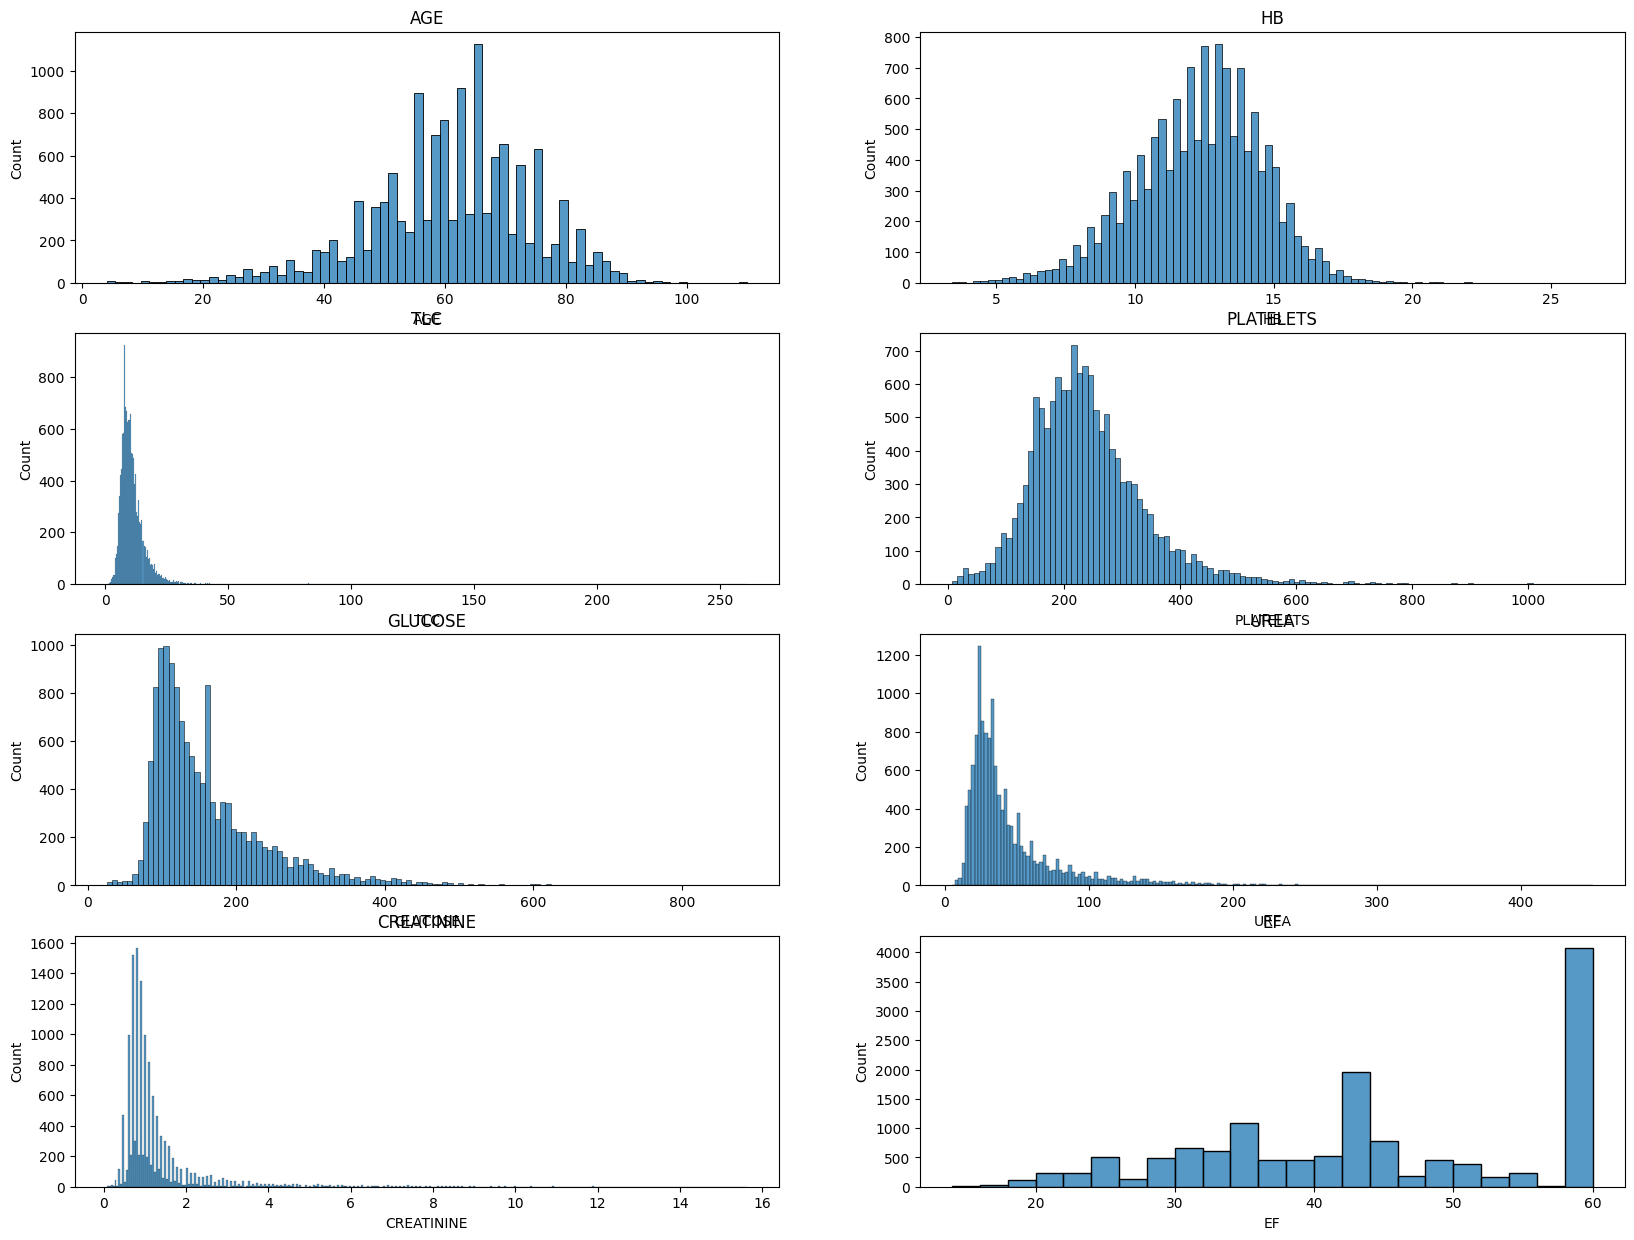

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(20, 15))

num_feat = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

axs = axs.flatten()

for ax, f in zip(axs, num_feat):
    ax.set_title(f"{f}")
    sns.histplot(data=df[f], ax=ax)

In [12]:
numericals = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

print(df[numericals].isnull().sum())

AGE           0
HB            0
TLC           0
PLATELETS     0
GLUCOSE       0
UREA          0
CREATININE    0
EF            0
dtype: int64


In [13]:
rob = RobustScaler()
numericals = ['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']
df_numerical = df[numericals]
df_numerical = rob.fit_transform(df_numerical)
df_numerical = pd.DataFrame(data=df_numerical, columns=['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF'])

df[numericals] = df_numerical.reset_index(drop=True)

df.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.0,6.123234e-17


In [14]:
df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15752,NaN,F,U,O,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15754,NaN,M,U,E,10,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15755,NaN,F,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01


In [15]:
df

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
0,1.117647,M,R,E,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
1,0.176471,M,R,E,5,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
2,-0.529412,M,U,E,3,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
3,0.294118,F,U,E,8,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
4,-0.117647,F,U,E,23,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15752,NaN,F,U,O,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15754,NaN,M,U,E,10,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01
15755,NaN,F,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,5.000000e-01


In [16]:
df[df['AGE'].isna()]

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,SMOKING,ALCOHOL,DM,HTN,CAD,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,sin_admission,cos_admission
13755,NaN,M,U,O,3,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13756,NaN,F,U,O,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13757,NaN,F,U,O,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13758,NaN,M,U,E,16,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
13759,NaN,M,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,F,U,E,9,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15752,NaN,F,U,O,5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15754,NaN,M,U,E,10,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5
15755,NaN,F,U,O,4,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0.866025,0.5


## Non numerical features

In [17]:
df_non_numerical = df.select_dtypes(exclude=['number'])

enc_binary = OneHotEncoder(drop='if_binary', sparse_output=False)
enc_binary.fit(df_non_numerical)

df_non_numerical[enc_binary.get_feature_names_out()] = enc_binary.transform(df_non_numerical)

df_non_numerical_cols = df_non_numerical.iloc[:, :3].columns

df_non_numerical = df_non_numerical.iloc[:, 3:]

df_non_numerical.columns = df_non_numerical_cols

df_non_numerical

,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
15751,0.0,1.0,0.0
15752,0.0,1.0,1.0
15754,1.0,1.0,0.0
15755,0.0,1.0,1.0


In [21]:
df_numerical_reset = df_numerical.reset_index(drop=True)
df_non_numerical_reset = df_non_numerical.reset_index(drop=True)
df_sin_cos = df[['sin_admission', 'cos_admission']].reset_index(drop=True)

treated_cols = list(df_numerical_reset.columns) + list(df_non_numerical_reset.columns) + list(df_sin_cos.columns)

df_other_cols = df.drop(columns=treated_cols)
df_other_cols_reset = df_other_cols.reset_index(drop=True)

df_processed = pd.concat([df_numerical_reset, df_non_numerical_reset, df_sin_cos, df_other_cols_reset], axis=1)
df_processed

,AGE,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,EF,GENDER,RURAL,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1.117647,-0.967742,1.24,0.964602,-0.678571,0.000000,-0.017241,-0.33845,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.176471,0.387097,-0.18,-0.699115,-0.297619,-0.592593,-0.017241,-0.05845,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.529412,-0.612903,0.96,0.893805,0.595238,2.185185,2.396552,0.00000,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.294118,0.096774,0.00,0.513274,-0.083333,-0.259259,-0.534483,-0.05845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.117647,0.354839,-0.16,-1.787611,0.083333,0.777778,0.586207,-1.09845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,-0.117647,-1.419355,3.02,-1.460177,1.011905,-0.592593,-0.706897,-0.21845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13751,1.411765,-1.193548,0.76,1.176991,-0.071429,0.851852,0.844828,-0.21845,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13752,1.176471,-1.032258,0.36,1.274336,0.869048,1.222222,1.706897,-0.45845,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
13753,-0.176471,0.193548,0.52,1.796460,0.190476,-0.185185,-0.189655,0.66155,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# Train test split

In [24]:
X = df_processed.drop(columns='DURATION OF STAY')
y = df_processed['DURATION OF STAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11004, 49)
(2751, 49)
(11004,)
(2751,)


# Baseline

In [26]:
lin_reg = LinearRegression()

cv_results = cross_validate(lin_reg, X_train, y_train, cv=5, scoring='r2')
cv_results['test_score'].mean()

0.2063638838895565